In [1]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [2]:
breast_img = glob.glob('C:/breast histopathology images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [3]:
for imgname in breast_img[:3]:
    print(imgname)

C:/breast histopathology images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:/breast histopathology images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:/breast histopathology images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


In [4]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [5]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [6]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

In [7]:
data_insight_1

state of cancer  Numbers of Patients
0               0               198738
1               1                78786

In [8]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

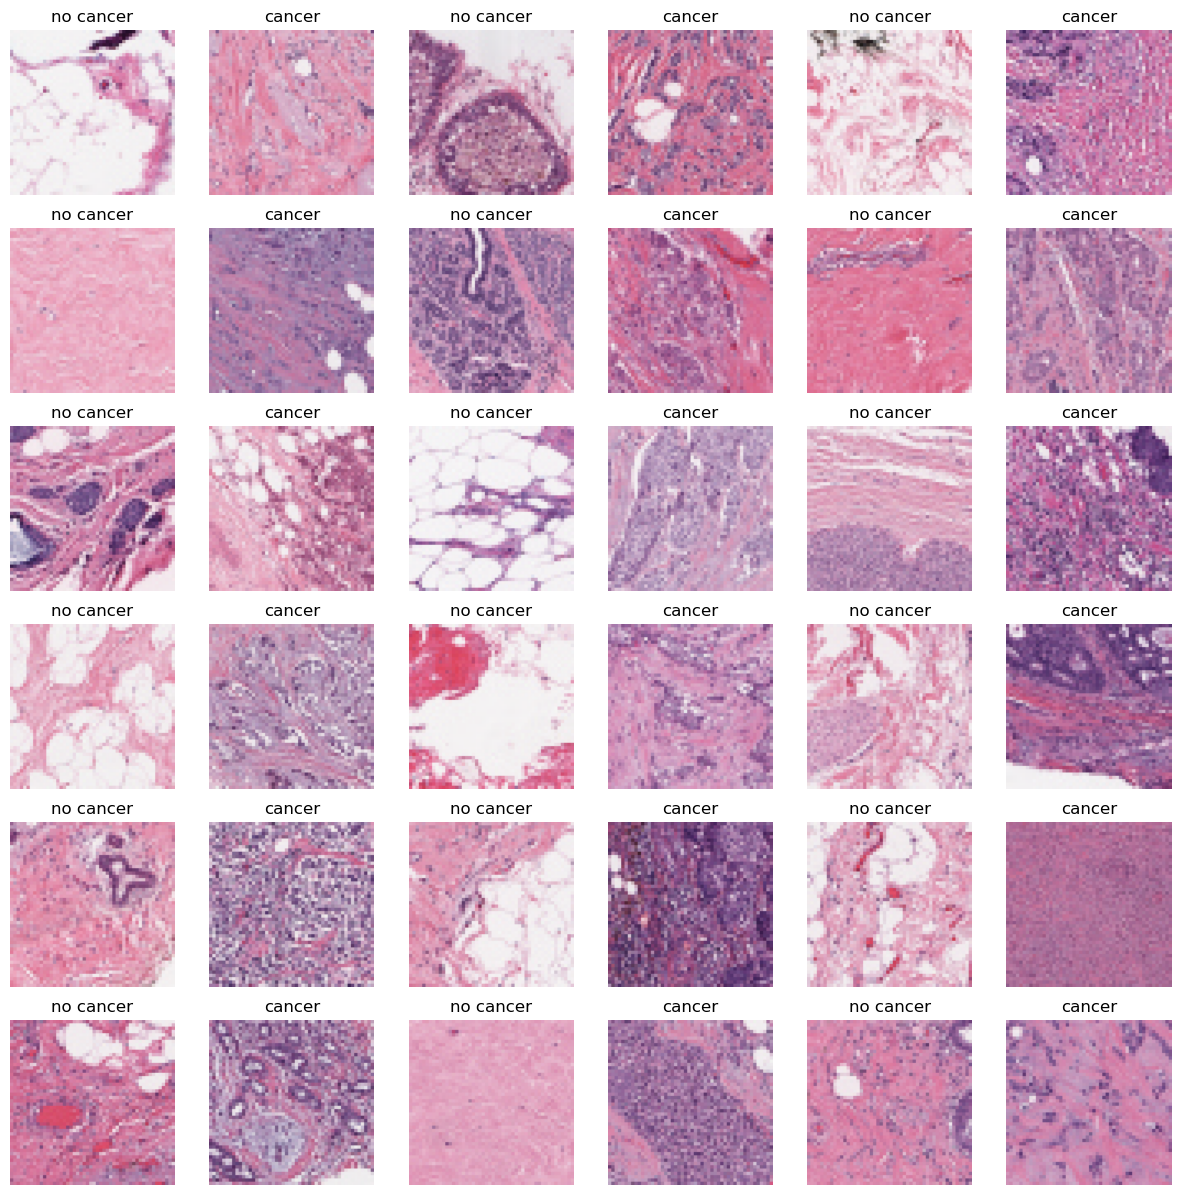

In [9]:
import keras.utils as image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [10]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [11]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

<__array_function__ internals>:180: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



X shape : (277524, 50, 50, 3)


In [12]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (222019, 50, 50, 3)
X_test shape : (55505, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (55505, 2)


In [13]:
import tensorflow as tf 
tf.random.set_seed(100)

In [14]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25 , batch_size = 75)

Epoch 1/25
2961/2961 [==============================] - 592s 200ms/step - loss: 0.1640 - accuracy: 0.9538 - val_loss: 0.1363 - val_accuracy: 0.9565
Epoch 2/25
2961/2961 [==============================] - 499s 168ms/step - loss: 0.1314 - accuracy: 0.9563 - val_loss: 0.1287 - val_accuracy: 0.9574
Epoch 3/25
2961/2961 [==============================] - 483s 163ms/step - loss: 0.1265 - accuracy: 0.9575 - val_loss: 0.1245 - val_accuracy: 0.9579
Epoch 4/25
2961/2961 [==============================] - 456s 154ms/step - loss: 0.1220 - accuracy: 0.9588 - val_loss: 0.1208 - val_accuracy: 0.9594
Epoch 5/25
2961/2961 [==============================] - 458s 155ms/step - loss: 0.1170 - accuracy: 0.9602 - val_loss: 0.1192 - val_accuracy: 0.9592
Epoch 6/25
2961/2961 [==============================] - 457s 154ms/step - loss: 0.1106 - accuracy: 0.9623 - val_loss: 0.1124 - val_accuracy: 0.9618
Epoch 7/25
2961/2961 [==============================] - 453s 153ms/step - loss: 0.1035 - accuracy: 0.9649 - val_

In [18]:
model.evaluate(X_test,y_test)

1735/1735 [==============================] - 34s 19ms/step - loss: 0.2114 - accuracy: 0.9638


[0.21135878562927246, 0.9638410806655884]

1735/1735 [==============================] - 33s 19ms/step


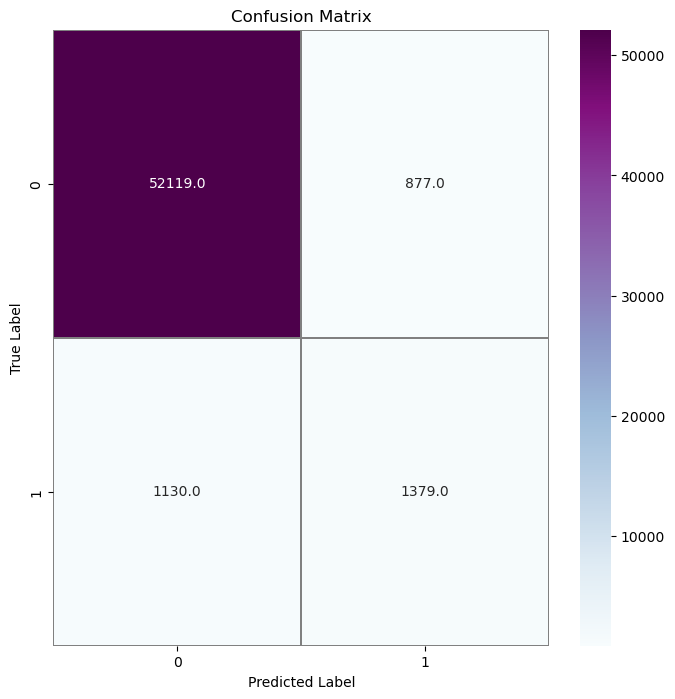

In [19]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

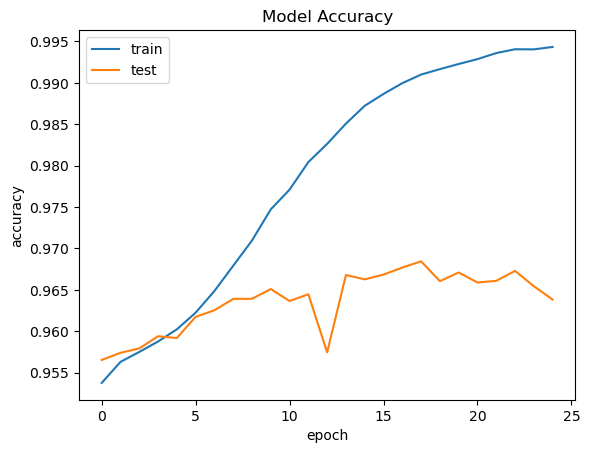

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

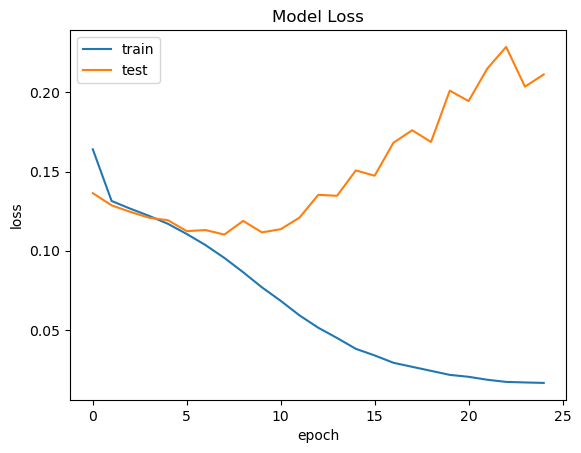

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
prediction = model.predict(X_test)
prediction

1735/1735 [==============================] - 29s 17ms/step


array([[1.0000000e+00, 1.1629516e-18],
       [1.0000000e+00, 9.9694510e-09],
       [1.0000000e+00, 1.5202285e-09],
       ...,
       [9.9674207e-01, 3.2579016e-03],
       [7.3485804e-05, 9.9992657e-01],
       [1.0000000e+00, 5.2491334e-13]], dtype=float32)

In [23]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

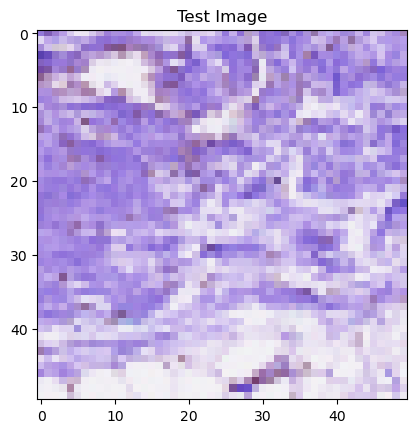

In [24]:
index = 804
img_plot(X_test, index)

In [25]:
input = X_test[index:index+1]

In [26]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

1/1 [==============================] - 0s 21ms/step


In [27]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)

Predicted Value using  cnn model 0
True Value 0


In [29]:
import os.path
if os.path.isfile('E:/Model/HistoModel.h5') is False:
    model.save('E:/Model/HistoModel.h5')